<a href="https://colab.research.google.com/github/SamikshaMulay-04/DL/blob/main/Pract2_feed_forward_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Practical – Feedforward Neural Network (Keras + TensorFlow)

# (a) Import necessary packages
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# (b) Load training & testing data (MNIST)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalizing data
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test  = x_test.reshape(-1, 28*28) / 255.0

In [4]:

# (c) Define Network Architecture (Keras Sequential)
model = models.Sequential([
    layers.Dense(128, activation="relu", input_shape=(784,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# (d) Train model using SGD
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6883 - loss: 1.1120 - val_accuracy: 0.9163 - val_loss: 0.3006
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9069 - loss: 0.3323 - val_accuracy: 0.9323 - val_loss: 0.2331
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9252 - loss: 0.2615 - val_accuracy: 0.9437 - val_loss: 0.1931
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9325 - loss: 0.2331 - val_accuracy: 0.9548 - val_loss: 0.1685
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9418 - loss: 0.2025 - val_accuracy: 0.9588 - val_loss: 0.1482


In [6]:
# (e) Evaluate the network
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9409 - loss: 0.2010
Test Accuracy: 0.9495999813079834


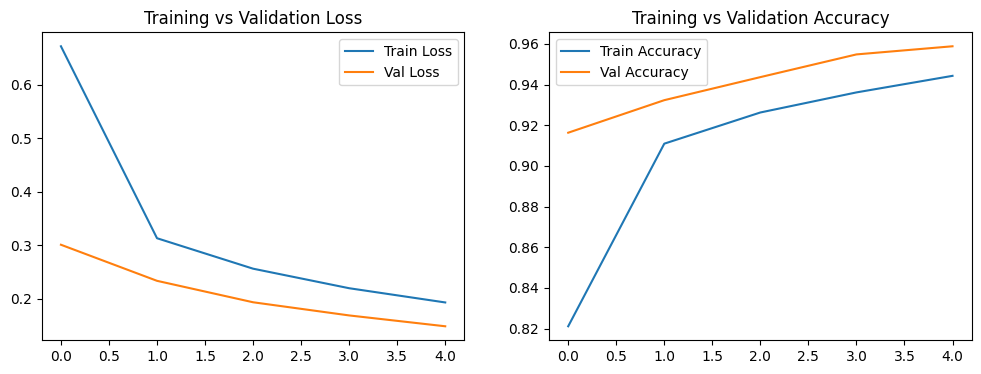

In [7]:
# (f) Plot Training Loss & Accuracy
plt.figure(figsize=(12,4))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Training vs Validation Loss")
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

plt.show()
